In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
OUT_DIR = "dados/contagem/"
df_equip = pd.read_json(OUT_DIR + 'equipamentos_contagem.json')

In [3]:
df_equip.head()

,idEquipamento,localizacao,localizacaoCombo,uf,municipio,km,br,latitude,longitude,codEquipamento,snv,dtInicioOperacao,dtInicioOperacaoFmt,duplo
0,181,BR-040/MG km 145,BR-040/MG km 145,MG,João Pinheiro,145.0,40,-17.757386,-46.159294,4008,150,2014-05-02T00:00:00,02/05/2014,False
1,261,BR-040/MG km 419,BR-040/MG km 419,MG,Curvelo,419.0,40,-19.155558,-44.562164,40044,230,2014-09-19T00:00:00,19/09/2014,False
2,246,BR-040/MG km 500,BR-040/MG km 500,MG,Esmeraldas,500.0,40,-19.705209,-44.169716,40073,330,2014-08-04T00:00:00,04/08/2014,True
3,188,BR-040/MG km 551,BR-040/MG km 551,MG,Nova Lima,551.0,40,-20.054947,-43.972397,40062,400,2014-05-29T00:00:00,29/05/2014,True
4,187,BR-040/MG km 579,BR-040/MG km 579,MG,Itabirito,579.0,40,-20.289733,-43.938575,40052,410,2014-05-29T00:00:00,29/05/2014,True


In [4]:
df_equip_mg = df_equip[df_equip.uf == 'MG']
df_equip_mg.to_csv(OUT_DIR + 'equipamentos_contagem_mg.csv')

In [5]:
import mplleaflet

In [8]:
plt.scatter(df_equip_mg.longitude, df_equip_mg.latitude)
mplleaflet.display()

# Lendo contagens de MG

In [7]:
from  pathlib import Path
arquivos = Path(OUT_DIR)
df_mg = pd.concat(list([pd.read_json(f) for f 
                        in arquivos.glob('MG*contagem.json')]))
df_mg                        

,idSumVH,idEquipamento,sentido,ano,mes,dia,hora,valorVH,a,b,c,d,e,f,g,h,i,j,l
0,11283655,189,C,2014,6,1,0,31,3,11,3,4,2,1,0,0,7,0,0
1,4236147,189,D,2014,6,1,0,24,2,7,0,1,2,1,0,0,11,0,0
2,9897719,189,C,2014,6,1,1,23,2,10,2,3,1,0,0,0,5,0,0
3,783277,189,D,2014,6,1,1,30,2,13,0,3,2,0,0,0,8,2,0
4,4234082,189,C,2014,6,1,2,24,2,14,2,0,0,0,0,0,6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74875,8350778,232,D,2018,12,30,21,214,3,5,3,0,2,2,0,0,193,5,1
74876,4086359,232,C,2018,12,30,22,137,3,7,0,0,0,1,0,0,123,1,2
74877,801939,232,D,2018,12,30,22,170,4,5,3,1,4,2,0,1,137,8,5
74878,9025079,232,C,2018,12,30,23,87,3,5,2,1,2,1,0,0,65,3,5


In [10]:
df_mg.groupby('ano')['valorVH'].sum()

ano
2014     72917927
2015    138197873
2016    142047411
2017    161514813
2018    142527135
Name: valorVH, dtype: int64

Qual o total de equipamentos funcionando?

In [11]:
df_mg.idEquipamento.unique().size

57

In [33]:
df_mensal = df_mg.groupby(['idEquipamento', 'ano', 'mes'])[['valorVH']].sum().rename(columns={'idSumVH': 'n_veiculos'})
df_mensal

valorVH
idEquipamento ano  mes         
173           2014 5     133384
                   6     126750
                   7     124231
                   8     134731
                   9     126566
...                         ...
467           2018 6     126316
                   10    108128
                   11    128755
                   12    130046
546           2017 8      70660

[1660 rows x 1 columns]

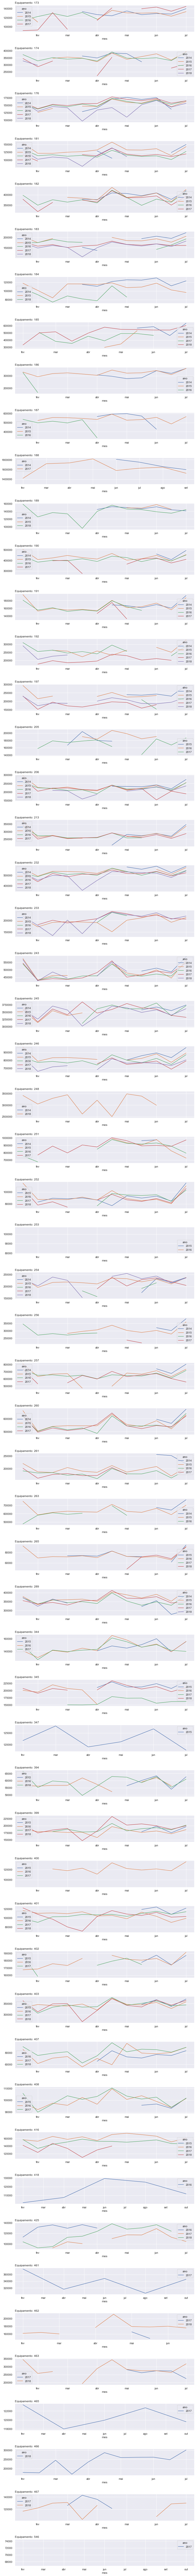

In [133]:

fig, axes = plt.subplots(nrows=len(df_mensal.index.levels[0]), figsize=(13,190))
fig.subplots_adjust(hspace=.7)
for ax, (id_equip, df) in zip(axes, df_mensal.groupby(level=0)):
    ddf =df.unstack(level=1).droplevel(0).droplevel(0, axis=1).reindex(range(1,13,1))
    ax.set_title(f"Equipamento: {id_equip}", x=0, ha='left')
    #display(ddf)
    ddf.plot.line(ax=ax)
    ax.set_xticklabels(['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez'])
    


In [131]:
df_mensal.loc[462].unstack(level=0).droplevel(0, axis=1).reindex(range(1,13,1))

ano,2017,2018
mes,,
1,NaN,NaN
2,NaN,161648.0
3,NaN,164034.0
4,NaN,160201.0
5,NaN,NaN
6,NaN,176833.0
7,NaN,211222.0
8,165504.0,179361.0
9,148482.0,178330.0


In [91]:
df_mensal.loc[173].unstack(level=0).droplevel(0, axis=1).plot.line(subplots=True, sharey=True);

0 3 3
1 3 3
2 3 3
3 3 3
4 3 3
5 3 3
6 3 3
7 3 3
8 3 3
9 3 3


In [ ]:
s